## Exploration 4. Ïù∏Í≥µÏßÄÎä•ÏúºÎ°ú ÏÑ∏ÏÉÅÏóê ÏóÜÎçò ÏÉàÎ°úÏö¥ Ìå®ÏÖò ÎßåÎì§Í∏∞

# Project 'CIFAR-10 Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±ÌïòÍ∏∞'

**[ÌîÑÎ°úÏ†ùÌä∏ Î™©Ìëú]**
- DCGAN Î™®Îç∏ Íµ¨Ï°∞Î•º Ïù¥Ïö©Ìï¥ÏÑú CIFAR-10 Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÎäî Î™®Îç∏ Íµ¨ÌòÑ

**[ÏßÑÌñâÍ≥ºÏ†ï]**
1. ÏûëÏóÖÌôòÍ≤Ω Íµ¨ÏÑ±
2. Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±
3. ÏÉùÏÑ±Ïûê Î™®Îç∏ Íµ¨ÌòÑ
4. ÌåêÎ≥ÑÏûê Î™®Îç∏ Íµ¨ÌòÑ
5. ÏÜêÏã§Ìï®Ïàò, ÏµúÏ†ÅÌôî Ìï®Ïàò Íµ¨ÌòÑ
6. ÌõàÎ†®Í≥ºÏ†ï ÏÉÅÏÑ∏ Í∏∞Îä• Íµ¨ÌòÑ
7. ÌïôÏäµ Í≥ºÏ†ï ÏßÑÌñâ
8. GAN ÌõàÎ†® Í≥ºÏ†ï Í∞úÏÑ†


[Tips for Training Stable Generative Adversarial Networks](https://machinelearningmastery.com/how-to-train-stable-generative-adversarial-networks/)
The tips draw upon the suggestions from the DCGAN paper as well as elsewhere.
A summary of some of the more actionable tips is provided below.

- Normalize inputs to the range [-1, 1] and use tanh in the generator output.
- Flip the labels and loss function when training the generator.
- Sample Gaussian random numbers as input to the generator.
- Use mini batches of all real or all fake for calculating batch norm statistics.
- Use Leaky ReLU in the generator and discriminator.
- Use Average pooling and stride for downsampling; use ConvTranspose2D and stride for upsampling.
- Use label smoothing in the discriminator, with small random noise.
- Add random noise to the labels in the discriminator.
- Use DCGAN architecture, unless you have a good reason not to.
- A loss of 0.0 in the discriminator is a failure mode.
- If loss of the generator steadily decreases, it is likely fooling the discriminator with garbage images.
- Use labels if you have them.
- Add noise to inputs to the discriminator and decay the noise over time.
- Use dropout of 50 percent during train and generation.

# Step1. ÏûëÏóÖÌôòÍ≤Ω Íµ¨ÏÑ±

In [1]:
# # prepare folders for dataset, training
# !mkdir -p /aiffel/aiffel/workplace/EXPLORATION/Ex04/dcgan_newimage/cifar10/generated_samples
# !mkdir -p /aiffel/aiffel/workplace/EXPLORATION/Ex04/dcgan_newimage/cifar10/training_checkpoints
# !mkdir -p /aiffel/aiffel/workplace/EXPLORATION/Ex04/dcgan_newimage/cifar10/training_history

In [2]:
# # To generate GIFs
# !pip install imageio

In [3]:
# import library
import os
import glob
import time
import imageio
import PIL
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

print('tensorflow', tf.__version__)

tensorflow 2.6.0


# Step2. Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±

## Load data

- CIFAR-10 Îç∞Ïù¥ÌÑ∞ÏÖã ÌôúÏö©
- Î∂ÑÎ•òÎ¨∏Ï†úÏóêÏÑú ÏÇ¨Ïö©ÌñàÎçò labelÏù¥ ÌïÑÏöî ÏóÜÏùå -> `_(underscore)`Î°ú Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞(`y_train`, `y_test`)Îäî ÏÇ¨Ïö©x

In [4]:
# use cifar10 dataset
cifar10 = tf.keras.datasets.cifar10

(train_x, _), (test_x, _) = cifar10.load_data()

train_x.shape

(50000, 32, 32, 3)

In [5]:
print('max pixel:', train_x.max())
print('min pixel:', train_x.min())

max pixel: 255
min pixel: 0


In [6]:
# pixel normalization
train_x = (train_x - 127.5) / 127.5 # Normalize the images to [-1, 1]

print('max pixel:', train_x.max())
print('min pixel:', train_x.min())

max pixel: 1.0
min pixel: -1.0


In [7]:
# check shape
train_x.shape

(50000, 32, 32, 3)

In [8]:
train_x.dtype

dtype('float64')

- float64Îäî Î©îÎ™®Î¶¨Î•º Îçî ÎßéÏù¥ Ï∞®ÏßÄÌïòÍ≥†, 32bit floating point numberÎ≥¥Îã§ Ïó∞ÏÇ∞ÏÜçÎèÑÍ∞Ä ÎäêÎ¶º
    - float32Î°ú ÏàòÏ†ïÌï¥ÏÑú ÏÇ¨Ïö©

In [9]:
# data type Î≥ÄÍ≤Ω 
train_x = train_x.astype('float32')
train_x.shape, train_x.dtype

((50000, 32, 32, 3), dtype('float32'))

In [10]:
# check test dataset
test_x.shape

(10000, 32, 32, 3)

- train dataset : 50,000
- test dataset : 10,000
- Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶à : 32x32
- Ïª¨Îü¨Ïù¥ÎØ∏ÏßÄ

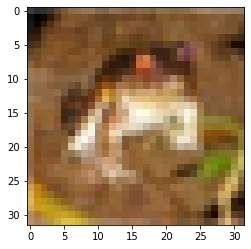

In [11]:
# visualize image
plt.imshow((train_x[0]+ 1) / 2) # Rescale values to [0, 1]
plt.show() 

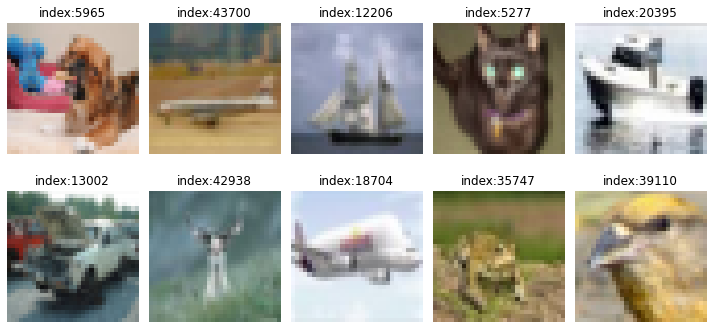

In [12]:
# visualize random 10 images
import random

plt.figure(figsize=(10,5))

# generate 10 random indices
random_indices = random.sample(range(len(train_x)), 10)

for i, index in enumerate(random_indices):
    plt.subplot(2, 5, i+1)
    plt.imshow((train_x[index] + 1) / 2) # Rescale values to [0, 1]
    plt.title(f'index:{index}')
    plt.axis('off') # Optional: Turn off axis labels for better visualization
    
plt.tight_layout()
plt.show()

## tf.Dataset ÎØ∏ÎãàÎ∞∞Ïπò ÏÇ¨Ïö©
- Îç∞Ïù¥ÌÑ∞Í∞Ä Ïûò ÏÑûÏù¥Í≤å ÌïòÎ†§Î©¥ BUFFER_SIZEÎ•º Ï¥ù Îç∞Ïù¥ÌÑ∞ÏÇ¨Ïù¥Ï¶àÏôÄ Í∞ôÍ≤å ÌïòÍ±∞ÎÇò ÌÅ¨Í≤å ÏÑ§Ï†ï!
- Î∞∞ÏπòÏÇ¨Ïù¥Ï¶àÎäî 100ÏúºÎ°ú ÏÑ§Ï†ï
    - [ÎÖºÎ¨∏](https://papers.nips.cc/paper/6125-improved-techniques-for-training-gans.pdf)ÏóêÏÑú ÏÇ¨Ïö©ÌñàÎçò ÏΩîÎìúÎ•º Î≥¥Îãà Í∏∞Î≥∏Í∞íÏùÑ 100ÏúºÎ°ú ÏÑ§Ï†ïÌïòÍ≥† Îß§Î≤à Îî∞Î°ú ÏûÖÎ†•Î∞õÎäî ÌòïÏãùÏúºÎ°ú ÌïúÍ≤É Í∞ôÎã§

In [13]:
# use tf.Dataset
BUFFER_SIZE = 50000  # to shuffle whole dataset : 50000
BATCH_SIZE = 100

In [14]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Model - DCGAN

- Deep Convolutional Generative Adversarial Network

---

## üí° [GAN Generative Adversarial Network](https://arxiv.org/pdf/1406.2661.pdf)
- ÏÉùÏÑ± Î™®Îç∏
- network : 
    - **Generator ÏÉùÏÑ±Ïûê** : random noiseÏóêÏÑú Ïù¥ÎØ∏ÏßÄ ÌòïÏÉÅÏùò Î≤°ÌÑ∞Î•º ÏÉùÏÑ±
    - **Discriminator ÌåêÎ≥ÑÏûê** : Í∏∞Ï°¥Ïùò ÏßÑÏßú Ïù¥ÎØ∏ÏßÄÏôÄ ÏÉùÏÑ±ÏûêÍ∞Ä ÎßåÎì† Ïù¥ÎØ∏ÏßÄÎ•º ÏûÖÎ†•Î∞õÏïÑ Ïã§Ï†úÏó¨Î∂ÄÎ•º ÌåêÎã®-Ïã§ÏàòÍ∞íÏúºÎ°ú Ï∂úÎ†•
- 2Í∞úÏùò ÎÑ§Ìä∏ÏõåÌÅ¨Í∞Ä ÏÑúÎ°ú Í≤ΩÏüÅÌïòÎ©∞ ÌååÎùºÎØ∏ÌÑ∞Î•º Ï°∞Ï†ïÌï¥ÏÑú Îçî Íµ¨Î≥ÑÌïòÍ∏∞ Ïñ¥Î†§Ïö¥ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏÉùÏÑ±ÎêòÎäî Î∞©Ïãù
    
**[REF]** [OpenAI-Generative models](https://openai.com/research/generative-models)

---

# Creat the models
**[REF]** [tf tutorial](https://www.tensorflow.org/tutorials/generative/dcgan)

üí° [Improved Techniques for Training GANs(paper)](https://papers.nips.cc/paper/6125-improved-techniques-for-training-gans.pdf)
> CIFAR-10 is a small, well studied dataset of 32 √ó 32 natural images.<br> We use this data set to study semi-supervised learning, as well as to examine the visual quality of samples that can be achieved.<br>
For the **discriminator** in our GAN we **use a 9 layer deep convolutional network with dropout and weight normalization**. <br>**The generator is a 4 layer deep CNN with batch normalization**

# Step 3. Generator Î™®Îç∏ Íµ¨ÌòÑ

## The Generator
The generator uses [`tf.keras.layers.Conv2DTranspose`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose) (upsampling) layers to produce an image from a seed (random noise). 

- Start with a Dense layer that takes this seed as input
- then upsample several times until you reach the **desired image size of 32x32x3**
- Notice the **[`tf.keras.layers.LeakyReLU`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LeakyReLU) activation for each layer**, except **the output layer which uses tanh**.


- `Conv2DTranspose`Îäî ÏùºÎ∞òÏ†ÅÏù∏ `Conv2D`ÏôÄ Î∞òÎåÄÎ°ú Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶àÎ•º ÎÑìÌòÄÏ§å ([transposed convolution](https://towardsdatascience.com/what-is-transposed-convolutional-layer-40e5e6e31c11))
- `Conv2DTranspose` 3Î≤à ÏßÑÌñâ : ÏúÑ ÎÖºÎ¨∏ÏùÑ Ï∞∏Í≥†Ìï¥ÏÑú `(4, 4, 512) ‚Üí (8, 8, 256) ‚Üí (16, 16, 128) ‚Üí (32, 32, 3)` ÏàúÏúºÎ°ú Ï§ÄÎπÑÌïú Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º ÎèôÏùºÌïú ÏÇ¨Ïù¥Ï¶àÍπåÏßÄ Ïù¥ÎØ∏ÏßÄÎ•º ÌÇ§ÏõåÍ∞ê

In [15]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(4*4*512, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((4, 4, 512)))
    assert model.output_shape == (None, 4, 4, 512)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 8, 8, 256)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 16, 16, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 32, 32, 3)

    return model

In [16]:
# check generator
generator = make_generator_model()

generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8192)              819200    
_________________________________________________________________
batch_normalization (BatchNo (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 8192)              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 256)         3276800   
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 256)         0

## GeneratorÎ°ú random noise ÏÉùÏÑ±
- tf.random.normalÏùÑ Ïù¥Ïö©ÌïòÎ©¥ Í∞ÄÏö∞ÏãúÏïà Î∂ÑÌè¨ÏóêÏÑú ÎΩëÏïÑÎÇ∏ ÎûúÎç§ Î≤°ÌÑ∞Î°ú Ïù¥Î£®Ïñ¥ÏßÑ ÎÖ∏Ïù¥Ï¶à Î≤°ÌÑ∞Î•º ÎßåÎì§ Ïàò ÏûàÎã§

In [17]:
# random noise vector
noise = tf.random.normal([1, 100])

generated_image = generator(noise, training=False) # ÏßÄÍ∏àÏùÄ trianingÏù¥ ÏïÑÎãàÍ∏∞ÎïåÎ¨∏Ïóê 'training=False'Î°ú ÏßÄÏ†ï
generated_image.shape 

TensorShape([1, 32, 32, 3])

batch_size=1Ïù∏ (32, 32, 3)shapeÏùò Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏÉùÏÑ±Îê®

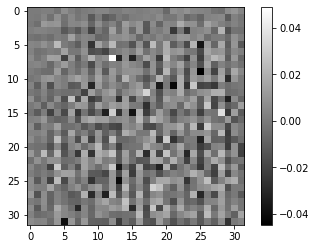

In [18]:
# Visualize random noise
plt.imshow(generated_image[0, :, :, 0], cmap='gray')
plt.colorbar()
plt.show()

# ‚úÖ colorÎ°ú ÏãúÍ∞ÅÌôîÌïòÎäî ÏΩîÎìúÎ°ú ÏàòÏ†ï

In [ ]:
# # Visualize random noise - color 
# plt.imshow(generated_image * 127.5 + 127.5)
# plt.show()

# Step 5. Discriminator Î™®Îç∏ Íµ¨ÌòÑ

## The Discriminator
- CNN-based image classifier
> For the discriminator in our GAN we use a **9 layer deep convolutional network with dropout and weight normalization**
    - [ÎÖºÎ¨∏](https://proceedings.neurips.cc/paper_files/paper/2016/file/8a3363abe792db2d8761d6403605aeb7-Paper.pdf)ÏóêÏÑúÎäî discriminatorÏóêÏÑú **Weight normalization Í∞ÄÏ§ëÏπòÏ†ïÍ∑úÌôî**ÎèÑ ÏßÑÌñâÌñàÎã§Í≥† ÌïòÎäîÎç∞, ÏùºÎã® model Íµ¨Ï°∞Îßå Ï∞∏Í≥†Ìï¥ÏÑú Íµ¨ÌòÑÌïòÍ≥†, ÏÑ±Îä•Í∞úÏÑ†Ìï† ÏãúÍ∞ÑÏù¥ ÏÉùÍ∏∞Î©¥ Í∑∏Îïå Ïù¥ Î∂ÄÎ∂ÑÏóê ÎåÄÌï¥ Ï∞æÏïÑÎ≥¥Í≥† ÏãúÎèÑÌï¥Î≥¥Î†§Í≥†ÌïúÎã§

In [19]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    
    # layer 1
    ### set stride 2 for final layer only
    model.add(layers.Conv2D(96, (3, 3), padding='same', input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2D(96, (3, 3), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2D(96, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.Dropout(0.5)) # 50% dropout

    # layer 2
    ### set stride 2 for final layer only
    model.add(layers.Conv2D(192, (3, 3), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2D(192, (3, 3), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2D(192, (3, 3), strides=(2, 2), padding='same'))    
    model.add(layers.Dropout(0.5)) # 50% dropout

    # layer 3
    model.add(layers.Conv2D(192, (3, 3), padding='valid')) # valid padding
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(192))
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(192))
    model.add(layers.LeakyReLU())
    model.add(layers.GlobalAveragePooling2D()) # Using global average pooling instead of Flatten

    # layer 4
    ### node 1 : goal is to have a binary output => whether the input is real or fake
    model.add(layers.Dense(1, activation='linear')) # Default activation for Dense is linear
              
    return model

Use the (as yet untrained) discriminator to classify the generated images as real or fake. 
- The model will be trained to output positive values for real images, and negative values for fake images.

In [20]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print(decision)

tf.Tensor([[2.3942048e-05]], shape=(1, 1), dtype=float32)


- decision Í∞íÏù¥ 0Ïóê Í∞ÄÍπåÏö∞Î©¥ fake **=> Í≤∞Í≥ºÍ∞í : ÏïÑÏßÅÏùÄ fake**
- decision Í∞íÏù¥ 1Ïóê Í∞ÄÍπåÏö∞Î©¥ real Î°ú Í∞ÑÏ£º


# Step 5. ÏÜêÏã§Ìï®Ïàò, ÏµúÏ†ÅÌôî Íµ¨ÌòÑ : Define the loss, optimizer

## Loss function - cross entropy
- GANÏùÄ loss funcitonÏúºÎ°ú ÍµêÏ∞® ÏóîÌä∏Î°úÌîºÎ•º ÏÇ¨Ïö©(Cross Entropy)
    - Îëê ÌôïÎ•† Î∂ÑÌè¨Ïùò Ï∞®Ïù¥Î•º Íµ¨Ìï†Îïå ÏÇ¨Ïö©
- DiscriminatorÎäî Ìïú Í∞úÏùò Ïù¥ÎØ∏ÏßÄÎ•º Í∞ÄÏßú(0)Ïù∏ÏßÄ ÏßÑÏßú(1)Ïù∏ÏßÄ ÌåêÎ≥Ñ -> Ïù¥ÏßÑÎ∂ÑÎ•ò : binary cross entropy ÏÇ¨Ïö©

- `BinaryCrossEntropy` : inputÏùÄ 0 - 1 ÏÇ¨Ïù¥Ïùò ÌôïÎ•†Í∞íÏù¥ÎùºÍ≥† Í∞ÄÏ†ï -> `from_logits=True`Î°ú ÏÑ§Ï†ïÌï¥ÏïºÌï®
> When from_logits=True, the model's output is considered a logit.<br> **A logit is a raw, unnormalized prediction score** that can range from negative infinity to positive infinity.<br> It **hasn't undergone the final activation function** (e.g., softmax) that would convert it into a probability.<br>
The logit values are useful during the training phase, especially when using loss functions that work directly with logits. This allows for more numerical stability during optimization.

In [21]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

**[Ïù¥ÎØ∏ÏßÄ label]**
- real img : label 1
- fake img : label 0


**cross_entropyÎ•º ÌôúÏö©Ìï¥ Í≥ÑÏÇ∞Ìï† lossÎì§ÏùÄ fake_outputÏôÄ real_output**
- fake_output : generator(ÏÉùÏÑ±Ïûê)Í∞Ä ÏÉùÏÑ±Ìïú Fake ImageÎ•º discriminator(Íµ¨Î∂ÑÏûê)Ïóê ÏûÖÎ†•ÏãúÏºúÏÑú ÌåêÎ≥ÑÎêú Í∞í = D(fake_image) 
- real_output : Í∏∞Ï°¥Ïóê ÏûàÎçò Real ImageÎ•º discriminator(Íµ¨Î∂ÑÏûê)Ïóê ÏûÖÎ†•ÏãúÏºúÏÑú ÌåêÎ≥ÑÎêú Í∞í = D(real_image) 


**loss Í≥ÑÏÇ∞ÏùÑ ÏúÑÌï¥ `tf.zeros_like()`, `tf.ones_like()`ÏÇ¨Ïö©**
- output shapeÍ≥º ÎèôÏùºÌïú 0 / 1Î°ú Ï±ÑÏõåÏßÑ tensorÎ•º ÎßåÎì§Ïñ¥ÏÑú cross-entropy ÎπÑÍµêÌï†Îïå ÏÇ¨Ïö©

## generator_loss
generator_lossÎäî **fake_outputÏù¥ 1**Ïóê Í∞ÄÍπåÏõåÏßÄÎäîÍ≤å Î™©Ìëú => ÏûòÎêòÎ©¥ loss Í∞íÏùÄ 0Ïóê Í∞ÄÍπåÏõåÏßê
- tf.ones_likeÏôÄÏùò ÍµêÏ∞® ÏóîÌä∏Î°úÌîºÍ∞íÏùÑ Í≥ÑÏÇ∞  
- `cross_entropy(tf.ones_like(fake_output), fake_output)` Í∞íÏùÄ 
    - fake_outputÏù¥ 1(Real ImageÎ•º ÏùòÎØ∏)Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù **ÏûëÏùÄ Í∞í**ÏùÑ Í∞ÄÏßê

In [22]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

## discriminator_loss
discriminator_lossÎäî **real_outputÏùÄ 1**Ïóê Í∞ÄÍπåÏõåÏßÄÍ∏∞Î•º, **fake_outputÏùÄ 0**Ïóê Í∞ÄÍπåÏõåÏßÄÎäîÍ≤å Î™©Ìëú

- ÏµúÏ¢Ö discriminator_loss Í∞íÏùÄ Ïù¥ ÎëòÏùÑ ÎçîÌïú Í∞í => Ïù¥ loss Í∞íÏùÑ ÏµúÏÜåÌôîÌï¥ÏïºÌï®! => 0ÏúºÎ°ú ÎêòÎ©¥ ÏïàÎêòÍ≥†, loss Í∞íÏùÄ 0.5Ïóê Í∞ÄÍπåÏõåÏïºÌï®?

In [23]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)

    total_loss = real_loss + fake_loss
    return total_loss

## discriminator accuracy
discriminatorÍ∞Ä real output, fake outputÏùÑ ÏñºÎßàÎÇò Ï†ïÌôïÌûà ÌåêÎ≥ÑÌïòÎäîÏßÄÏùò accuracyÎ•º Í≥ÑÏÇ∞ÌïòÎäîÍ≤ÉÎèÑ GANÏùò ÌïôÏäµÏóêÏÑú Îß§Ïö∞ Ï§ëÏöî!
- ÌäπÌûà Îëê accuracyÎ•º Îî∞Î°ú Í≥ÑÏÇ∞Ìï¥ÏÑú ÎπÑÍµêÌï¥ Î≥¥Îäî Í≤ÉÏù¥ Îß§Ïö∞ Ïú†Ïö©


- discriminatorÍ∞Ä **real outputÍ≥º fake outputÏùÑ accuracyÍ∞Ä 1.0Ïóê Í∞ÄÍπåÏö∏ Ï†ïÎèÑÎ°ú Ï†ïÌôïÌïòÍ≤å ÌåêÎ≥Ñ**Ìï¥ÎÇ∏Îã§Î©¥?
    - generatorÍ∞Ä ÎßåÎì§Ïñ¥ÎÇ¥Îäî **fake outputÏù¥ real outputÍ≥º Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇòÍ∏∞ ÎïåÎ¨∏**Ïóê ÌåêÎ≥ÑÏûêÍ∞Ä Îß§Ïö∞ ÏâΩÍ≤å ÌåêÎ≥ÑÌï¥ ÎÇ¥Í≥† ÏûàÎã§Îäî Îúª
    
    
- real accuracyÏôÄ fake accuracyÎäî **Ï¥àÎ∞òÏóêÎäî 1.0Ïóê Í∞ÄÍπùÍ≤å ÎÇòÏò§Îã§Í∞Ä, ÏÑúÏÑúÌûà ÎÇÆÏïÑÏ†∏ÏÑú Îëò Îã§ 0.5Ïóê Í∞ÄÍπåÏõåÏßÄÎäî Í≤ÉÏù¥ Ïù¥ÏÉÅÏ†Å**
    - fake accuracyÍ∞Ä 1.0Ïóê Îçî Í∞ÄÍπùÎã§Î©¥ ÏïÑÏßÅÏùÄ ÏÉùÏÑ±ÏûêÍ∞Ä ÌåêÎ≥ÑÏûêÎ•º Ï∂©Î∂ÑÌûà Ïûò ÏÜçÏù¥ÏßÄ Î™ªÌïòÍ≥† ÏûàÎã§Îäî ÏùòÎØ∏

In [24]:
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

ÏúÑ Ìï®Ïàò ÏïàÏóê ÏÇ¨Ïö©Îêú tensorflow Ìï®ÏàòÎì§Ïùò Ïó≠Ìï†ÏùÑ Ï†ïÎ¶¨ÌïòÎ©¥,

ex. real_output = tf.Tensor([0.2, 0.4, 0.7, 0.9]) ÎùºÎ©¥,

1. tf.math.greater_equal(real_output, tf.constant([0.5]) : real_outputÏùò Í∞Å ÏõêÏÜåÍ∞Ä 0.5 Ïù¥ÏÉÅÏù∏ÏßÄ True, FalseÎ°ú ÌåêÎ≥Ñ
> \>> tf.Tensor([False, False, True, True])


2. tf.cast( (1), tf.float32) : (1)Ïùò Í≤∞Í≥ºÍ∞Ä TrueÏù¥Î©¥ 1.0, FalseÏù¥Î©¥ 0.0ÏúºÎ°ú Î≥ÄÌôò
> \>> tf.Tensor([0.0, 0.0, 1.0, 1.0])


3. tf.reduce_mean( (2)) : (2)Ïùò Í≤∞Í≥ºÎ•º ÌèâÍ∑†ÎÇ¥Ïñ¥ Ïù¥Î≤à Î∞∞ÏπòÏùò Ï†ïÌôïÎèÑ(accuracy)Î•º Í≥ÑÏÇ∞
> \>> 0.5


## Optimizer Adam
Ï≤´Î≤àÏß∏ ÌïôÏäµÏóêÏÑúÎäî `learning rate=0.0001`Î°ú ÏÑ§Ï†ï
- Ïù¥ÌõÑÏóê Í∞í Ï°∞Ï†ï


**Ï§ëÏöîÌïú Ï†ê! generator, discriminator Îî∞Î°úÎî∞Î°ú ÌïôÏäµÏùÑ ÏßÑÌñâÌïòÎäî Í∞úÎ≥Ñ ÎÑ§Ìä∏ÏõåÌÅ¨Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê optimizerÎ•º Îî∞Î°ú ÎßåÎì§Ïñ¥Ï£ºÏñ¥Ïïº ÌïúÎã§!**

In [25]:
# set each optimizer
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

## random seed
Îß§Î≤à ÌïôÏäµÏù¥ Ïñ¥ÎñªÍ≤å ÏßÑÌñâÎêòÏñ¥Í∞ÄÍ≥† ÏûàÎäîÏßÄ, ÏÉùÏÑ±ÏûêÍ∞Ä ÏÉùÏÑ±Ìïú ÏÉòÌîåÏùÑ ÌôïÏù∏

- ÏÉòÌîåÏùÄ Ìïú Î≤àÏóê 16Ïû•ÏùÑ ÏÉùÏÑ±
- ÏÉùÏÑ±Ìï† ÏÉòÌîåÏùÄ Îß§Î≤à Í∞ôÏùÄ ÎÖ∏Ïù¥Ï¶àÎ°ú ÏÉùÏÑ±Ìï¥Ïïº Í∑∏Ïóê ÎåÄÌïú ÏßÑÏ†Ñ Í≥ºÏ†ïÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå => Í≥†Ï†ïÎêú seedÎ°ú ÎÖ∏Ïù¥Ï¶à ÏÉùÏÑ±
- Ï¶â, 100Ï∞®ÏõêÏùò ÎÖ∏Ïù¥Ï¶àÎ•º Ï¥ù 16Í∞ú, (16, 100) ÌòïÏÉÅÏùò Î≤°ÌÑ∞ Ï§ÄÎπÑ

In [26]:
# make noise sample with random seed
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

---

# Step 6. ÌõàÎ†®Í≥ºÏ†ï ÏÉÅÏÑ∏ Í∏∞Îä• Íµ¨ÌòÑ

# Define the training loop
ÌïòÎÇòÏùò ÎØ∏Îãà Î∞∞ÏπòÎãπ ÏßÑÌñâÌï† `train_step` Ìï®Ïàò Ï§ÄÎπÑ
- `@tf.function` Îç∞ÏΩîÎ†àÏù¥ÌÑ∞ ÏÇ¨Ïö©
> **tf.function** : Compiles a function into a callable **TensorFlow graph**


---

üí°
**[Tensorflow graph](https://www.tensorflow.org/api_docs/python/tf/Graph)**  
: Graph defines **the flow of data through the operations in a TensorFlow model**
- A TensorFlow computation, represented as a dataflow graph.

Graphs are data structures that contain 
- a set of tf.Operation objects, which represent units of computation
- tf.Tensor objects, which represent the units of data that flow between operations. 

=> In short, **graphs** are extremely useful and let your TensorFlow **run fast**, **run in parallel**, and **run efficiently on multiple devices**

*ü§ì Î¨¥Ïä® ÎßêÏù∏ÏßÄ Ïûò Ïù¥Ìï¥Í∞Ä ÏïàÍ∞ÄÏßÄÎßå,*
*tf.functionÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ tensorflowÍ∞Ä Îπ†Î•¥Í≥†, Î≥ëÎ†¨Î°ú, Îã§Ï§ëÏ≤òÎ¶¨Î•º Ìï†Ïàò ÏûàÎèÑÎ°ù Ìï¥Ï§ÄÎã§Í≥†ÌïúÎã§*

---

[REF] [blog - python decorator](https://schoolofweb.net/blog/posts/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%8D%B0%EC%BD%94%EB%A0%88%EC%9D%B4%ED%84%B0-decorator/), [tensorflow tutorial](https://www.tensorflow.org/api_docs/python/tf/function), [tf doc - graph & tf.funcion](https://www.tensorflow.org/guide/intro_to_graphs)

---

## `train_step` function

**train_step Ìï®Ïàò Íµ¨ÏÑ±**

- (1) ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞: Real Image Ïó≠Ìï†ÏùÑ Ìï† images Ìïú ÏÑ∏Ìä∏Î•º ÏûÖÎ†•ÏúºÎ°ú Î∞õÏùå
- (2) ÏÉùÏÑ±Ïûê ÏûÖÎ†• ÎÖ∏Ïù¥Ï¶à : generatorÍ∞Ä FAKE IMAGEÎ•º ÏÉùÏÑ±ÌïòÍ∏∞ ÏúÑÌïú noiseÎ•º images Ìïú ÏÑ∏Ìä∏ÏôÄ Í∞ôÏùÄ ÌÅ¨Í∏∞Ïù∏ BATCH_SIZE ÎßåÌÅº ÏÉùÏÑ±Ìï®
- (3) tf.GradientTape()Îäî Í∞ÄÏ§ëÏπò Í∞±Ïã†ÏùÑ ÏúÑÌïú GradientÎ•º ÏûêÎèô ÎØ∏Î∂ÑÏúºÎ°ú Í≥ÑÏÇ∞ÌïòÍ∏∞ ÏúÑÌï¥ with Íµ¨Î¨∏ Ïó¥Í∏∞
- (4) generated_images ÏÉùÏÑ± : generatorÍ∞Ä noiseÎ•º ÏûÖÎ†•Î∞õÏùÄ ÌõÑ generated_images ÏÉùÏÑ±
- (5) discriminator ÌåêÎ≥Ñ : discriminatorÍ∞Ä Real ImageÏù∏ imagesÏôÄ Fake ImageÏù∏ generated_imagesÎ•º Í∞ÅÍ∞Å ÏûÖÎ†•Î∞õÏùÄ ÌõÑ real_output, fake_output Ï∂úÎ†•
- (6) loss Í≥ÑÏÇ∞ : fake_output, real_outputÏúºÎ°ú generatorÏôÄ discriminator Í∞ÅÍ∞ÅÏùò loss Í≥ÑÏÇ∞
- (7) accuracy Í≥ÑÏÇ∞ : fake_output, real_outputÏúºÎ°ú discriminatorÏùò Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
- (8) gradient Í≥ÑÏÇ∞ : gen_tapeÏôÄ disc_tapeÎ•º ÌôúÏö©Ìï¥ gradientÎ•º ÏûêÎèôÏúºÎ°ú Í≥ÑÏÇ∞
- (9) Î™®Îç∏ ÌïôÏäµ : Í≥ÑÏÇ∞Îêú gradientÎ•º optimizerÏóê ÏûÖÎ†•Ìï¥ Í∞ÄÏ§ëÏπò Í∞±Ïã†
- (10) Î¶¨ÌÑ¥Í∞í : Ïù¥Î≤à Ïä§ÌÖùÏóê Í≥ÑÏÇ∞Îêú lossÏôÄ accuracyÎ•º Î¶¨ÌÑ¥

---

üí° `tf.GradientTape`
- a crucial component in TensorFlow for **automatic differentiation**, a technique used in training machine learning models


1. Context Management:
You use `with tf.GradientTape() as tape`: to define a context where operations are recorded for automatic differentiation.
2. Record Operations:
Inside the `with` block, **any operations involving TensorFlow variables are recorded by the tape**
3. Calculate Gradients:
After executing the operations, you can calculate gradients of a target tensor with respect to some source tensors
4. Automatic Differentiation:
TensorFlow **uses the recorded operations to automatically compute gradients using the backpropagation algorithm**

*ü§ì Ïó≠Ïãú Î¨¥Ïä®ÎßêÏù∏ÏßÄ Î™®Î•¥Í≤†ÏßÄÎßå tf.GradientTapeÎäî ÏûêÎèôÎØ∏Î∂ÑÏùÑ Ìï†Ïàò ÏûàÍ≤å Ìï¥Ï§ÄÎã§Í≥†ÌïúÎã§*

In [27]:
@tf.function
def train_step(images):  #(1) ÏûÖÎ†•Îç∞Ïù¥ÌÑ∞
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) ÏÉùÏÑ±Ïûê ÏûÖÎ†• ÎÖ∏Ïù¥Ï¶à

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() Ïò§Ìîà
        generated_images = generator(noise, training=True)  #(4) generated_images ÏÉùÏÑ±

        #(5) discriminator ÌåêÎ≥Ñ
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss Í≥ÑÏÇ∞
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy Í≥ÑÏÇ∞
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient Í≥ÑÏÇ∞
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) Î™®Îç∏ ÌïôÏäµ
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) Î¶¨ÌÑ¥Í∞í

## ÌïôÏäµÌòÑÌô© ÏãúÍ∞ÅÌôî Ìï®Ïàò - `generate_and_save_images`
train_stepÍ≥º Ìï®Íªò ÏùºÏ†ï Í∞ÑÍ≤©ÏúºÎ°ú ÌïôÏäµ ÌòÑÌô©ÏùÑ Î≥º Ïàò ÏûàÎäî ÏÉòÌîåÏùÑ ÏÉùÏÑ±ÌïòÎäî Ìï®Ïàò
- ÏïÑÍπå ÎßåÎì§Ïñ¥ ÎÜìÏïòÎçò Í≥†Ï†ïÎêú seedÎ•º Ïù¥Ïö©Ìï¥ÏÑú Í≤∞Í≥ºÎ¨ºÏùÑ ÎßåÎì§Ïñ¥ÎÇ¥ÎØÄÎ°ú, Í≥†Ï†ïÎêú seedÏóê ÎåÄÌïú Í≤∞Í≥ºÎ¨ºÏù¥ ÏñºÎßàÎÇò ÎÇòÏïÑÏßÄÍ≥† ÏûàÎäîÏßÄÎ•º ÌôïÏù∏Ìï† Ïàò ÏûàÎã§
    - 16Í∞úÏù¥ÎØÄÎ°ú 4Ìñâ 4Ïó¥Î°ú ÎÇòÎàÑÏñ¥ subplot(4, 4, i+1)Î°ú ÏãúÍ∞ÅÌôî
    - pltÏóê Ï†ÄÏû•ÎêòÏñ¥ Î≥¥Ïù¥Îäî Ïù¥ÎØ∏ÏßÄÎ•º plt.savefigÎ°ú Í∞ÑÎã®Ìûà ÌååÏùºÎ°ú Ï†ÄÏû•

# ‚úÖ `plt.imshow(prediction[i] + 1) / 2)` Î°ú ÏàòÏ†ïÌï¥ÏÑú Ïª¨Îü¨Î°ú Ï∂úÎ†•ÎêòÎèÑÎ°ù Ï°∞Ï†ï!<br>
‚úÖ Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ Ï°∞Í∏à Îçî ÌÅ¨Í≤å Ï°∞Ï†ïÌï¥Î≥¥Í∏∞

<!-- ÏäπÌôòÎãòÏù¥ ÏïåÎ†§Ï§Ä srtÍ¥ÄÎ†® ÏóêÎü¨ : plt.axis('off') Ï£ºÏÑùÏ≤òÎ¶¨!
        
#     for i in range(predictions.shape[0]):
#         plt.subplot(4, 4, i+1)
#         img = predictions[i].numpy()
#         img = (img* 127.5) + 127.5
#         img = img.astype(int)
#         plt.imshow(img)
#         plt.axis('off') -->

In [37]:
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')
   
    plt.savefig('{}/aiffel/workplace/EXPLORATION/Ex04/dcgan_newimage/cifar10/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

In [ ]:
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i]*127.5 + 127.5) # reverse of normalization
        plt.axis('off')
   
    plt.savefig('{}/aiffel/workplace/EXPLORATION/Ex04/dcgan_newimage/cifar10/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

## accuracy, history ÏãúÍ∞ÅÌôî Ìï®Ïàò - `draw_train_history`
lossÏôÄ accuracy Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôîÎäî ÌïôÏäµ Í≥ºÏ†ïÏùÑ Ï≤¥ÌÅ¨ÌïòÍ∏∞ ÏúÑÌï¥ Îß§Ïö∞ Ï§ëÏöî!
- train_step() Ìï®ÏàòÍ∞Ä Î¶¨ÌÑ¥ÌïòÎäî `gen_loss`, `disc_loss`, `real_accuracy`, `fake_accuracy` Ïù¥ÏÉÅ 4Í∞ÄÏßÄ Í∞íÏùÑ **historyÎùºÎäî dict Íµ¨Ï°∞Ïóê Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•**Ìï¥ÎëêÍ≥† 
- **Îß§ epochÎßàÎã§ ÏãúÍ∞ÅÌôî**
    - ÏòàÎ•º Îì§Ïñ¥ ÏÉùÏÑ±ÏûêÏùò lossÏùò historyÎäî history['gen_loss']Î°ú Ï†ëÍ∑ºÌï† Ïàò ÏûàÎäî listÎ°ú Í¥ÄÎ¶¨

In [38]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab Ï∞®Ìä∏Ïùò Í∏∞Î≥∏ ÌÅ¨Í∏∞Î•º 15,6ÏúºÎ°ú ÏßÄÏ†ï

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  

    # training_history ÎîîÎ†âÌÜ†Î¶¨Ïóê epochÎ≥ÑÎ°ú Í∑∏ÎûòÌîÑÎ•º Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎ°ú Ï†ÄÏû•
    plt.savefig('{}/aiffel/workplace/EXPLORATION/Ex04/dcgan_newimage/cifar10/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

## checkpoint - `training_checkpoint`
`tf.train.Checkpoint`Î°ú Î≤ÑÏ†ÑÍ¥ÄÎ¶¨
- epochÎßàÎã§ Î™®Îç∏ Ï†ÄÏû•
- checkpoint : optimizerÏôÄ generator, discriminator(Ï†ïÌôïÌûàÎäî ÏÉùÏÑ±ÏûêÏôÄ ÌåêÎ≥ÑÏûêÍ∞Ä ÌïôÏäµÌïú Î™®Îç∏ Í∞ÄÏ§ëÏπò) Ï†ÄÏû•

In [39]:
checkpoint_dir = os.getenv('HOME')+'aiffel/workplace/EXPLORATION/Ex04/dcgan_newimage/cifar10/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

# Step 7. ÌïôÏäµ Í≥ºÏ†ï ÏßÑÌñâ

# Train the model 

**`train` Ìï®Ïàò** : ÌïÑÏöîÌïú Ìï®ÏàòÎì§ Î™®Îëê Í≤∞Ìï©
- train_step() : Ìïú Îã®Í≥Ñ ÌïôÏäµ
- generate_and_save_images() : ÏÉòÌîå Ïù¥ÎØ∏ÏßÄÎ•º ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•
- draw_train_history() : ÌïôÏäµ Í≥ºÏ†ïÏùÑ ÏãúÍ∞ÅÌôî
- checkpoint : ÌïôÏäµ Í≥ºÏ†ïÏùÑ ÏãúÍ∞ÅÌôî

=> ÌïôÏäµÍ≥ºÏ†ïÏùò loss, accuracy Í∑∏ÎûòÌîÑ Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏù¥ ../dcgan_newimage/cifar10/training_history Í≤ΩÎ°úÏóê ÏÉùÏÑ±Îê® : ÏßÑÌñâ Í≥ºÏ†ïÏùÑ ÏàòÏãúÌôïÏù∏Ìï¥Î≥¥Ïûê

In [40]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

In [32]:
# set epoch
save_every = 5
EPOCHS = 50 

# ÏÇ¨Ïö©Í∞ÄÎä•Ìïú GPU ÎîîÎ∞îÏù¥Ïä§ ÌôïÏù∏
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [33]:
# train

%%time
train(train_dataset, EPOCHS, save_every)

UsageError: Line magic function `%%time` not found.


- cell magic ÏùÄ ÏΩîÎìúÏÖÄ Ï≤´Ï§ÑÏóê ÎÇòÏôÄÏïºÌïúÎã§!

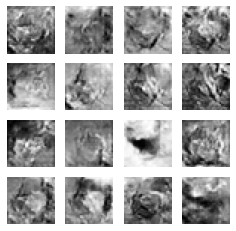

Time for training : 3634 sec


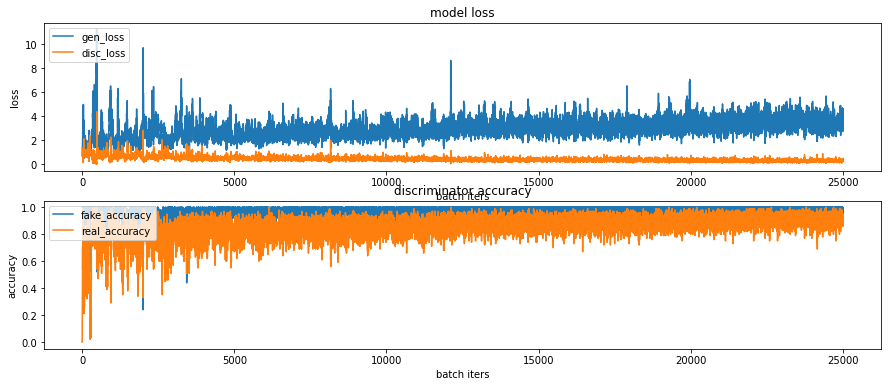

CPU times: user 19min 25s, sys: 2min 41s, total: 22min 7s
Wall time: 1h 36s


In [42]:
%%time

# train
train(train_dataset, EPOCHS, save_every)

- ÎßåÏïΩ ÏÉùÏÑ±ÏûêÍ∞Ä ÎßåÎì† Fake ImageÏóê ÎåÄÌïú ÌåêÎ≥ÑÏûêÏùò Accuracy(fake_accuracy)Í∞Ä Í≥ÑÏÜç 1Ïóê Í∞ÄÍπùÍ≤å Ïú†ÏßÄÎêòÍ≥† ÏûàÎã§Î©¥, 
    - ÏÉùÏÑ±ÏûêÍ∞Ä ÎßåÎì† Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏïÑÏßÅ ÌåêÎ≥ÑÏûêÎ•º ÏÑ±Í≥µÏ†ÅÏúºÎ°ú ÏÜçÏù¥ÏßÄ Î™ªÌïòÍ≥† ÏûàÎã§Îäî ÏùòÎØ∏

- Í≤∞Í≥ºÎ¨ºÏù¥ ÏïÑÏßÅ ÌùêÎ¶øÌïòÎ©¥ Îçî ÎßéÏùÄ epochÏúºÎ°ú ÌïôÏäµÏùÑ ÏãúÌÇ§Í±∞ÎÇò Î™®Îç∏Íµ¨Ï°∞/ÌïôÏäµÎ∞©Î≤ï Î≥ÄÍ≤Ω



# ÌïôÏäµÍ≥ºÏ†ï ÏãúÍ∞ÅÌôî
ÌïôÏäµÏù¥ ÎÅùÎÇú ÌõÑ ÏÉùÏÑ±ÌñàÎçò ÏÉòÌîå Ïù¥ÎØ∏ÏßÄÎì§ÏùÑ Ìï©Ï≥ê GIF ÌååÏùº(ÏùºÎ™Ö ÏõÄÏß§) ÏÉùÏÑ±

- imageio ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÌôúÏö©
    - imageio.get_writerÎ•º ÌôúÏö©Ìï¥ÏÑú ÌååÏùºÏùÑ Ïó¥Í≥†, Í±∞Í∏∞Ïóê append_dataÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÌïòÎÇòÏî© Î∂ôÏó¨ÎÇòÍ∞ÄÎäî Î∞©Ïãù

In [46]:
anim_file = os.getenv('HOME')+'/aiffel/workplace/EXPLORATION/Ex04/dcgan_newimage/cifar10/cifar10_dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/workplace/EXPLORATION/Ex04/dcgan_newimage/cifar10/generated_samples/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/workplace/EXPLORATION/Ex04/dcgan_newimage/cifar10/cifar10_dcgan.gif

-rw-r--r-- 1 root root 2048966 Jan 23 07:33 /aiffel/aiffel/workplace/EXPLORATION/Ex04/dcgan_newimage/cifar10/cifar10_dcgan.gif


### ÏßÄÍ∏àÍπåÏßÄ ÎßåÎì§Ïñ¥ÏßÑ Ïù¥ÎØ∏ÏßÄ gif
<img src='./dcgan_newimage/cifar10/cifar10_dcgan.gif'>


### history Ï†ÄÏû•Îêú Ïù¥ÎØ∏ÏßÄ ÎπÑÍµê
1.EPOCH 1 <img src='./img/train_history_0000.png'>
2.EPOCH 3 <img src='./img/train_history_0002.png'>
3.EPOCH 7 <img src='./img/train_history_0006.png'>
4.EPOCH 15 <img src='./img/train_history_0014.png'>
5.EPOCH 25 <img src='./img/train_history_0024.png'>
6.EPOCH 35 <img src='./img/train_history_0034.png'>
7.EPOCH 45 <img src='./img/train_history_0044.png'>

=> ÏóêÌè¨ÌÅ¨ 15 Ïù¥ÌõÑÎ∂ÄÌÑ∞Îäî Í±∞Ïùò ÎπÑÏä∑Ìïú ÏñëÏÉÅÏùò Í∑∏ÎûòÌîÑÍ∞Ä Í∏∞Î°ùÎêòÏóàÎã§.

---

# Summary

- GANÏóê ÎåÄÌïú Ï†ÑÎ∞ò Ïù¥Ìï¥Í∞Ä Î∂ÄÏ°±Ìï¥ÏÑú ÎÇòÏò® Í≤∞Í≥ºÎ¨ºÏù¥ Ïñ¥Îñ§ ÏùòÎØ∏Î•º Í∞ñÎäîÏßÄ Ìï¥ÏÑùÌïòÎäîÍ≤å Ïñ¥Î†§Ïõ†Ïùå
- checkpointÏóêÏÑú Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû•ÏùÑ ÌùëÎ∞±ÏúºÎ°ú ÌïòÎäî Î∞îÎûåÏóê ÏµúÏ¢Ö Ï†ÄÏû•Îêú Ïù¥ÎØ∏ÏßÄÍ∞Ä ÌùëÎ∞±ÏúºÎ°ú ÎßåÎì§Ïñ¥Ïßê
- Ïñ¥Ï®åÎì† ÏôÑÏÑ±Îêú gif Ïù¥ÎØ∏ÏßÄÎ•º Î≥¥Î©¥ Ï†úÎåÄÎ°ú Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏÉùÏÑ±ÎêòÏßÄ Î™ªÌñàÎã§ÎäîÍ±¥ ÏïåÏàò ÏûàÏùå
- ÏïÑÏù¥Ìé† ÌïôÏäµÏãúÍ∞Ñ Ïù¥ÌõÑÏóê Îã§Ïãú ÏΩîÎìúÎ•º ÏàòÏ†ïÌï¥ÏÑú ÏãúÎèÑÍ∞Ä ÌïÑÏöîÌï®

---

# KPT

**[KEEP]**
- ÏÇ¨ÏÜåÌïú ÏóêÎü¨Îäî ÏùºÎã® Ìï¥Í≤∞Ìï¥Í∞ÄÎ©∞ ÏΩîÎìúÎ•º ÏôÑÏÑ±ÌñàÎã§.

**[PROBLEM]**
- GAN Ïù¥Î°† Ï†ÑÎ∞òÏóê ÎåÄÌïú Ïù¥Ìï¥Í∞Ä Î∂ÄÏ°±ÌïòÎã§. ÌäπÌûà lossÍ∞í, Ï†ïÌôïÎèÑ Í¥ÄÎ†®Ìï¥ÏÑú Ïñ¥Îñ§ Î∞©ÏãùÏúºÎ°ú Í∞íÏù¥ ÏÇ∞Ï∂úÎêòÎäîÏßÄ, Î∏îÎ°úÍ∑∏Ïùò Í∞úÎÖêÏÑ§Î™ÖÏóê Îß§ÏπòÌïòÎ©¥ÏÑú Ïù¥Ìï¥ÌïòÍ∏∞Í∞Ä Ïñ¥Î†§Ïõ†Îã§.
- Ïª¨Îü¨ Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•Ìï¥ÏïºÌïòÎäîÎç∞ ÌùëÎ∞±Ïù¥ÎØ∏ÏßÄÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Ï†ÄÏû•ÌïòÎäîÎ∞îÎûåÏóê Í≤∞Í≥ºÎ¨ºÏù¥ ÌùëÎ∞±Ïù¥Îã§.


**[TRY]**
- GANÏùÑ Íµ¨ÏÑ±ÌïòÎäî Ïó¨Îü¨ Í∞úÎÖê(cross entropy, lossÍ∞í Ìï¥ÏÑù Í¥ÄÎ†®, GAN Ïù¥Î°†)ÏùÑ ÌïòÎÇòÏî© Ï∞®Í∑ºÏ∞®Í∑º Ï†ïÎ¶¨ÌïòÍ≥† Îã§Ïãú Î™®Îç∏ÏùÑ Íµ¨ÌòÑÌï¥Î≥∏Îã§.

---

# ‚úÖ Ïó¨Í∏∞ÏÑúÎ∂ÄÌÑ∞Îäî ÏïÑÏù¥Ìé† ÏùºÍ≥º Ïù¥ÌõÑ ÏãúÍ∞ÑÏóê ÏßÑÌñâÏòàÏ†ï


# Step 8. GAN ÌõàÎ†® Í≥ºÏ†ï Í∞úÏÑ†
